In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #chuyển InvoiceDate thành datetime object
df1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] #lấy các cột dữ liệu cần thiết
df1['Revenue'] = df1['Quantity'] * df1['UnitPrice'] #tính doanh thu trên mỗi row
df1 = df1.set_index(['InvoiceDate']) #chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
df2 = df1.loc['2011'] #lọc những hàng mà index có chứa '2011'
df2 = df2.reset_index()
df3 = df2.groupby(by=df2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng

df4 = df1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') # xóa bỏ các dòng trùng lặp của cùng một đơn hàng
df4 = df4.loc['2011']
df4 = df4.reset_index()
df5 = df4.groupby(by=df4['InvoiceDate'].dt.month).count() #đếm tổng số đơn hàng trong tháng

/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_82013/103276550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue'] = df1['Quantity'] * df1['UnitPrice'] #tính doanh thu trên mỗi row
/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_82013/103276550.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df2.groupby(by=df2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng


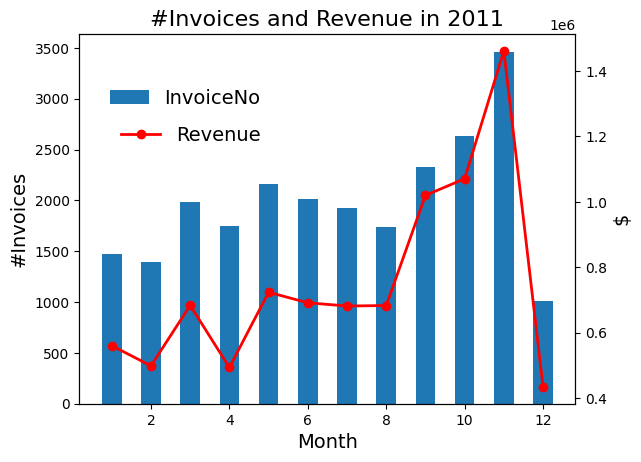

In [28]:
x = df5.index.get_level_values(0)
plt.bar(x, df5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(x, df3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
ax1.set_xlabel('Month', fontsize = 14)
ax1.set_ylabel('#Invoices', fontsize = 14)
ax2.set_ylabel('$', fontsize = 14)

#plt.legend(handles=[ax1, ax2])
ax1.legend(fontsize = 14,bbox_to_anchor=(0.4, 0.9), frameon = False)
ax2.legend(fontsize = 14, bbox_to_anchor=(0.4, 0.8), frameon = False)
plt.title('#Invoices and Revenue in 2011', fontsize = 16)
plt.show()